# Insurance Cost Prediction

# Task - 1

## Business Case:

The Insurance Cost Prediction aims to create a meachine learning model which can predict the Insurance price charges according to the various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses

## Domain Analysis

### Dataset Description

* **Features** :

* **DataShape** : The dataset has 6 input variables, and 1 output variables, and 1338 datapoints.

* **Categorical Columns** : Sex, Children, Smoker, Region.

* **Numerical Columns** : Age, BMI.

## Data Attributes

1.**Age**: age of primary beneficiary  
2.**Sex**: beneficiary’s gender - female or male  
3.**Bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  
4.**Children**: Number of children covered by health insurance / Number of dependents  
5.**Smoker**: Smoking or non-smoking  
6.**Region**: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.  
7.**Charges**: Individual medical costs billed by health insurance (to be predicted)  
8.**Id**: id of beneficiary  

## Project Process Steps:

1. **Importing Libraries**
2. **Basic Checks**
3. **EDA(Exploratory Data Analysis)**
4. **Data Preprocessing**
5. **Feature Selection**
6. **Model Creation**
7. **Evaluation**
8. **Conclusion**

## Importing Libraries

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [194]:
data = pd.read_csv('datasets insurance(1).csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now , we can understand the data and its shape(1338,7)

This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).


## Basic Checks

In [195]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [196]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [197]:
data.info() #Getting information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [198]:
data.describe() #Describing the data to get mean,std,min,max,25%,50%,75% of the data 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [199]:
data.describe(include='O') 

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [200]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## EDA(Exploratory Data Analysis)

### Univariant Analysis

In [201]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [202]:
## Categorical data
df=data[['sex','children','smoker','region']]

In [203]:
## Numerical data
df1=data[['age','bmi']]

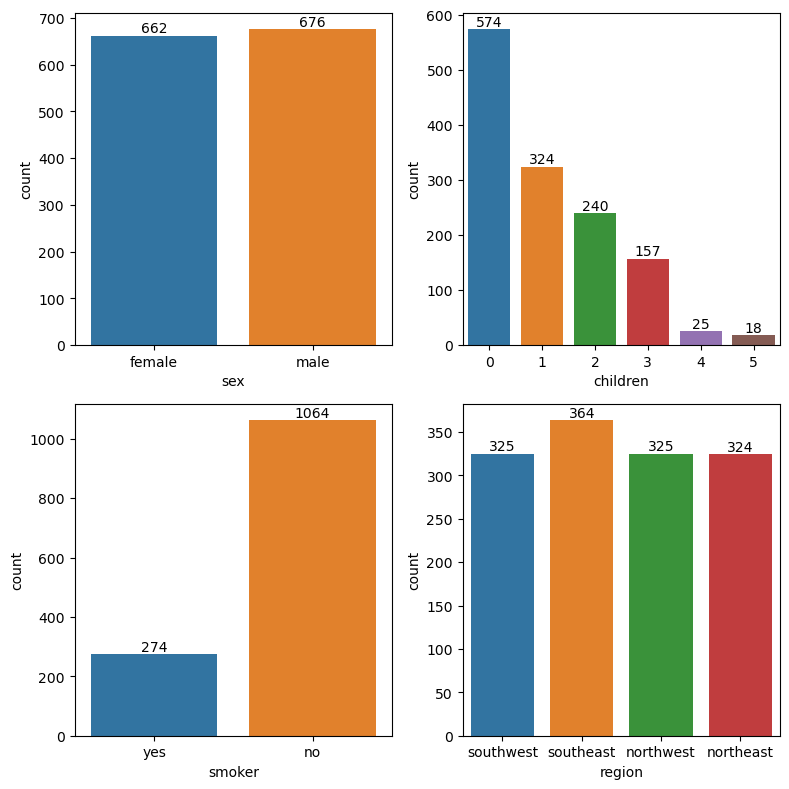

In [204]:
plt.figure(figsize=(8,8)) # For categorical data we use count plot.
plotnumber=1

for i in df:
    plt.subplot(2,2,plotnumber)
    ax = sns.countplot(x=df[i])
    plotnumber=plotnumber+1
    for i in ax.containers:
        ax.bar_label(i)
    
plt.tight_layout()

#### isights

**Sex**     :Both female and male count are equal.  
**children**  :From total 1338 observations, 45% of people have no children, 20% of people have only 1 child & it is gradually decreased.   
**Smoker**  :From the above data of 1338 observations , 80% of people have a habit to smoke and remaining dont.   
**Region**  :There are equal no.of people from all the regions.   

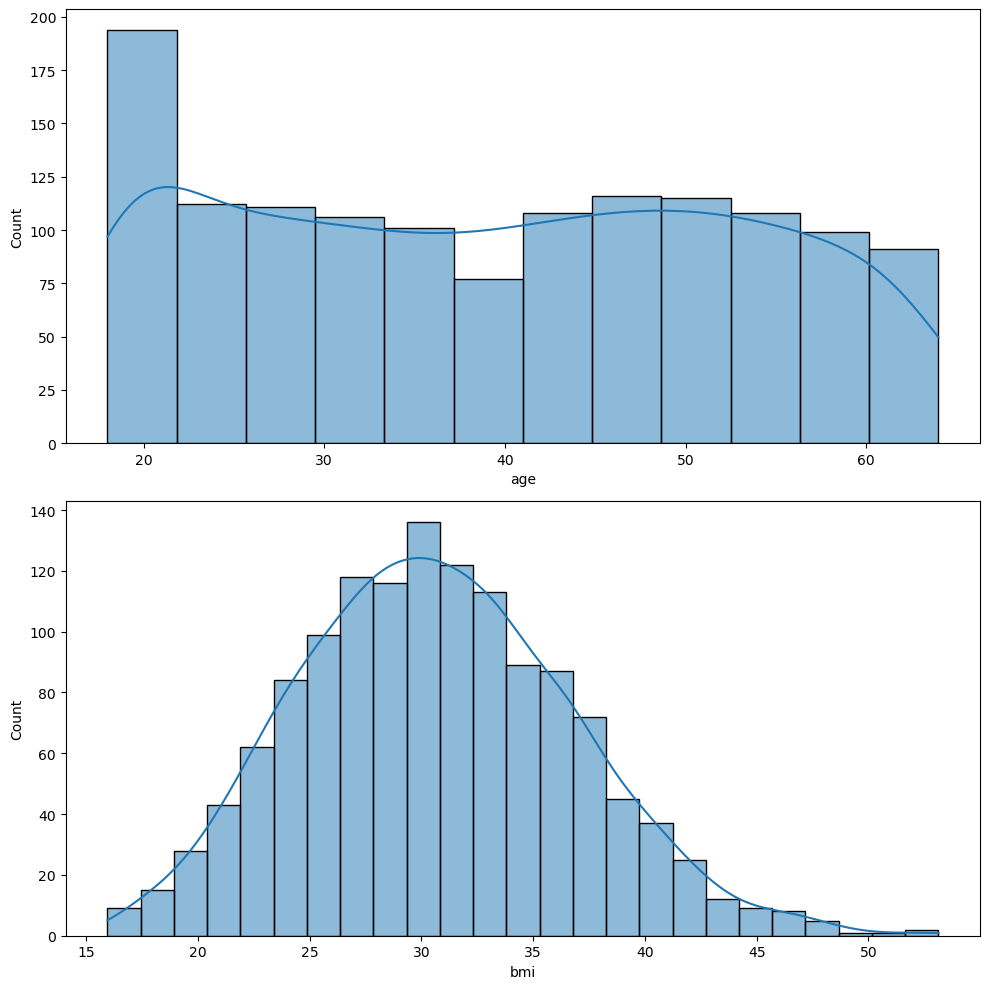

In [205]:
plt.figure(figsize=(10,10)) #For numerical/continuos data we use Histogramtunna 
plotnumber = 1

for i in df1:
    plt.subplot(2,1,plotnumber)
    sns.histplot(x=df1[i],kde = True)
    plotnumber = plotnumber + 1

plt.tight_layout()

#### insight

**Age**  :We observe that people between the age 18-20 are in majority.  
**BMI**  :The majority of the people contain BMI index as 27 to 33. 

### Bivariate Analysis

E:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


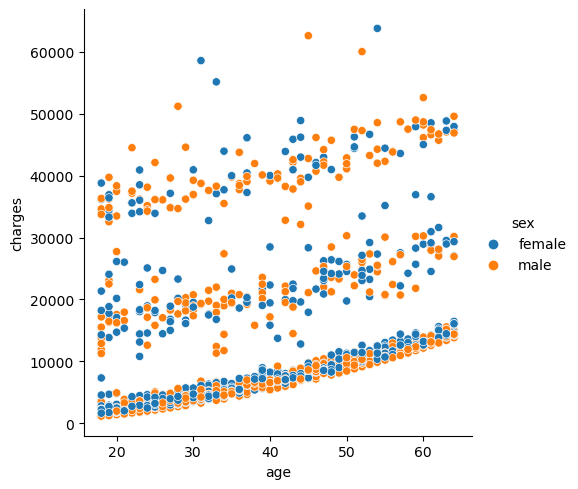

In [206]:
sns.relplot(x = 'age',y = 'charges', hue = 'sex', data=data)   

E:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


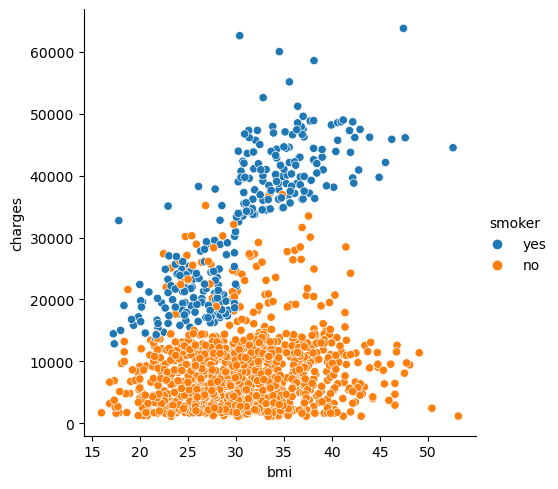

In [207]:
sns.relplot(x = 'bmi', y = 'charges',hue = 'smoker', data = data)

E:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


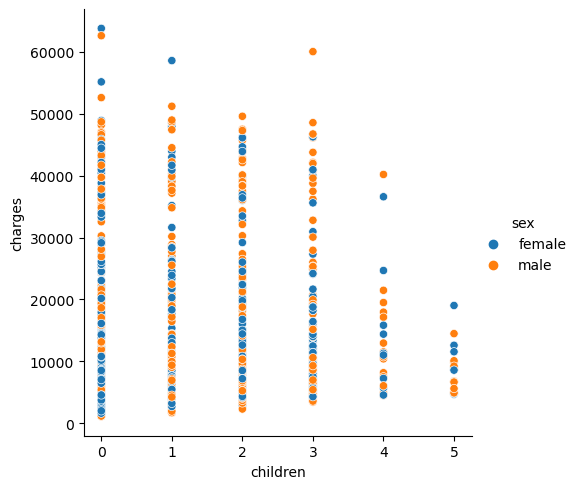

In [208]:
sns.relplot(x ='children',y = 'charges', hue = 'sex', data = data)

E:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


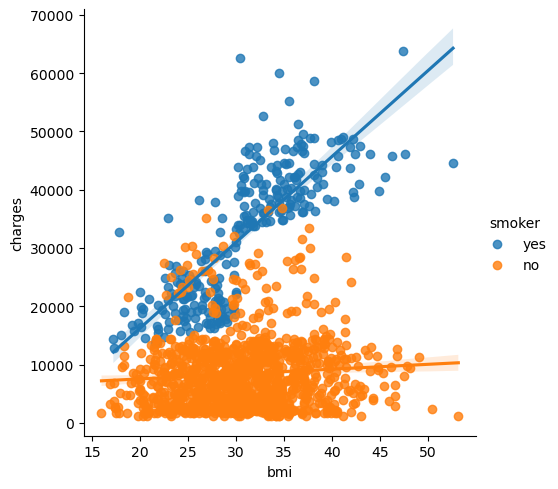

In [209]:
sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker',data = data)

## Data Preprocessing

In [210]:
# checking missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no Null values in this data

In [211]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Handling with outliers

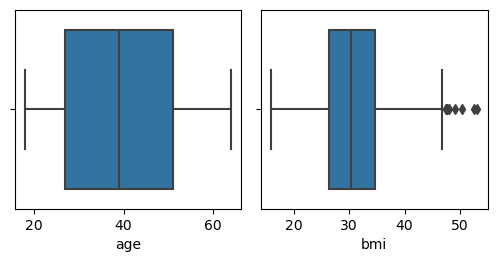

In [212]:
# checking the Outliers
plt.figure(figsize = (10,10))
plotnumber= 1

for i in df1:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(x = df1[i])
    plotnumber+=1
plt.tight_layout()

## Handling Categorical Data

#### Encoding

In [213]:
# Converting the Categorical data to Numarical data
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker']= data['smoker'].map({'yes':0,'no':1})
data['region']=data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [214]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


## Feature Selection

<Axes: >

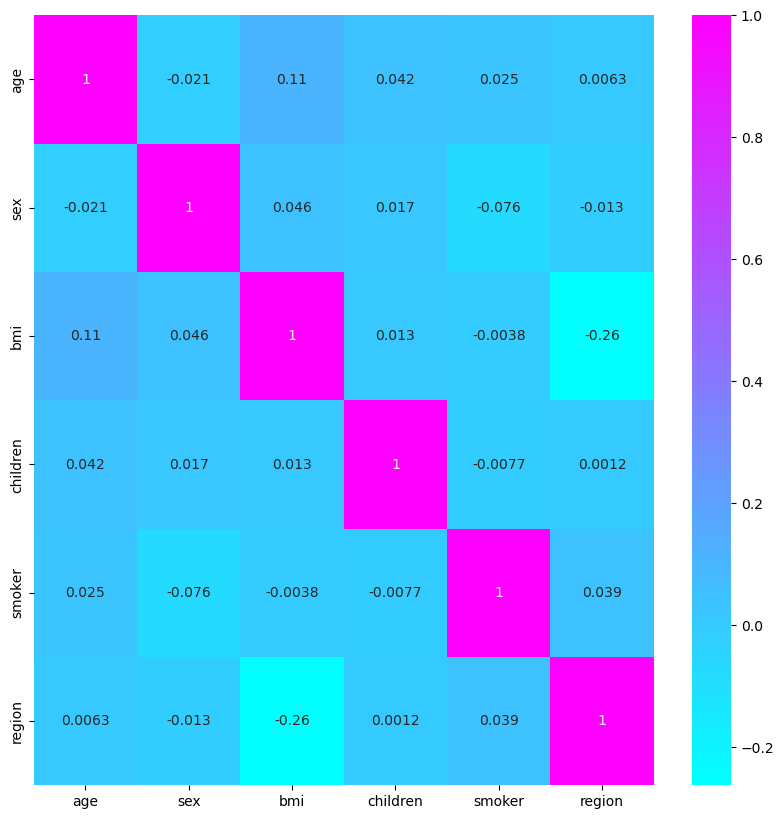

In [215]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('charges',axis = 1).corr(), annot=True, cmap='cool')

# Task-2

## Model Creation

In [216]:
x = data.drop('charges',axis = 1)
y = data.charges
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [217]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [218]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

# Task-3

## Model Evaluation

## 1. Linear Regression

#### 1. prediciton on training data

In [219]:
# Linear Regression
y_train_predict=LR.predict(x_train)
train_score=r2_score(y_train,y_train_predict)# Checking R2_score on training

train_adjusted_r2 = 1-(1-train_score)*(1070-1)/(1070-6-1) ## CHecking adjusted r2 score for training data

print("R2_score:",train_score)
print("adjusted r2 score :",train_adjusted_r2)
print("mean_squared_error :",mean_squared_error(y_train,y_train_predict))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_train_predict)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_predict))

R2_score: 0.7415700001111735
adjusted r2 score : 0.7401113171390823
mean_squared_error : 37300137.90013731
root mean squared_error: 6107.383883475584
mean_absolute_error: 4210.357472502764


#### 2. prediciton on test data

In [220]:
#y_test_predict=LR.predict(x_test)
test_score=r2_score(y_test,y_test_predict)

# CHecking adjusted r2 score for testing data
test_adjusted_r2 = 1-(1-test_score)*(268-1)/(268-6-1)


print("R2_score:",test_score)
print("adjusted r2 score :",test_adjusted_r2)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict))

R2_score: 0.7839279776463969
adjusted r2 score : 0.7789608047187279
mean_squared_error : 33544907.381259006
root mean squared_error: 5791.796559035806
mean_absolute_error: 4174.047876486467


## Predictive model

In [221]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


In [222]:
data2 = ([[21,0, 25.80, 0, 1,1]])

In [223]:
array = np.asanyarray(data2)

In [224]:
pred = LR.predict(array)

E:\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [225]:
print('cost peice pred :' , pred)

cost peice pred : [1580.15365115]


## Multiple Model

## 2. Decision Tree Model

In [226]:
DT = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=15,
    min_samples_split=3,
    min_samples_leaf=13,
    min_weight_fraction_leaf=0.0,
    max_features=15,
    random_state=1,
    max_leaf_nodes=15,
    min_impurity_decrease=0.0,
    ccp_alpha=0.5,
)

In [227]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.5, max_depth=15, max_features=15,
                      max_leaf_nodes=15, min_samples_leaf=13,
                      min_samples_split=3, random_state=1)

### 1. Training data

In [228]:
# Decision tree
y_train_predict_DT=DT.predict(x_train)
train_score_DT=r2_score(y_train,y_train_predict_DT)# Checking R2_score on training

train_adjusted_r2_DT = 1-(1-train_score_DT)*(1070-1)/(1070-6-1) ## CHecking adjusted r2 score for training data

print("R2_score:",train_score_DT)
print("adjusted r2 score :",train_adjusted_r2_DT)
print("mean_squared_error :",mean_squared_error(y_train,y_train_predict_DT))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_train_predict_DT)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_predict_DT))

R2_score: 0.8664271906915308
adjusted r2 score : 0.865673251974832
mean_squared_error : 19279047.359277036
root mean squared_error: 4390.791199690215
mean_absolute_error: 2595.477130740334


### 2.Testing Data

In [229]:
y_test_predict_DT=DT.predict(x_test)
test_score_DT=r2_score(y_test,y_test_predict_DT)

## CHecking adjusted r2 score for testing data
test_adjusted_r2_DT = 1-(1-test_score_DT)*(268-1)/(268-6-1)


print("R2_score:",test_score_DT)
print("adjusted r2 score :",test_adjusted_r2_DT)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_DT))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_DT)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_DT))

R2_score: 0.8646913611919707
adjusted r2 score : 0.8615808177710964
mean_squared_error : 21006494.534825105
root mean squared_error: 4583.284252021153
mean_absolute_error: 2638.5782059046746


## 3. Random Forest Regression

In [230]:
RF = RandomForestRegressor(n_estimators=150,
    criterion='squared_error',
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    max_samples=None,
)

In [231]:
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=150)

### 1.Training Data

In [232]:
# Random Forest regression
y_train_predict_RF=RF.predict(x_train)
train_score_RF=r2_score(y_train,y_train_predict_RF)# Checking R2_score on training

train_adjusted_r2_RF = 1-(1-train_score_RF)*(1070-1)/(1070-6-1) ## CHecking adjusted r2 score for training data

print("R2_score:",train_score_RF)
print("adjusted r2 score :",train_adjusted_r2_RF)
print("mean_squared_error :",mean_squared_error(y_train,y_train_predict_RF))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_train_predict_RF)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_predict_RF))

R2_score: 0.9271854964951806
adjusted r2 score : 0.9267745021198006
mean_squared_error : 10509581.020114476
root mean squared_error: 3241.848395609282
mean_absolute_error: 1759.6445153939885


### 2.Testing Data

In [233]:
y_test_predict_RF=RF.predict(x_test)
test_score_RF=r2_score(y_test,y_test_predict_RF)

## CHecking adjusted r2 score for testing data
test_adjusted_r2_RF = 1-(1-test_score_RF)*(268-1)/(268-6-1)


print("R2_score:",test_score_RF)
print("adjusted r2 score :",test_adjusted_r2_RF)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_RF))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_RF)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_RF))

R2_score: 0.8777996636048556
adjusted r2 score : 0.874990460469335
mean_squared_error : 18971447.21321417
root mean squared_error: 4355.622482862142
mean_absolute_error: 2377.9243422398904


## 4. XGBRegressor

In [234]:
GBR = GradientBoostingRegressor(loss='squared_error',
    n_estimators=200,
    criterion='friedman_mse',
    min_samples_split=4,
    min_samples_leaf=2,
    max_depth=5,
)

In [235]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                          n_estimators=200)

#### 1. Training Data

In [236]:
# Random Forest regression
y_train_predict_GBR=GBR.predict(x_train)
train_score_GBR=r2_score(y_train,y_train_predict_GBR)

train_adjusted_r2_GBR = 1-(1-train_score_GBR)*(1070-1)/(1070-6-1)

print("R2_score:",train_score_GBR)
print("adjusted r2 score :",train_adjusted_r2_GBR)
print("mean_squared_error :",mean_squared_error(y_train,y_train_predict_GBR))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_train,y_train_predict_GBR)))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_predict_GBR))

R2_score: 0.9704294187658601
adjusted r2 score : 0.9702625104992516
mean_squared_error : 4268029.092191786
root mean squared_error: 2065.9208823650015
mean_absolute_error: 1151.3838923915316


#### 2. Testing Data

In [237]:
y_test_predict_GBR=GBR.predict(x_test)
test_score_GBR=r2_score(y_test,y_test_predict_GBR)

## CHecking adjusted r2 score for testing data
test_adjusted_r2_GBR = 1-(1-test_score_GBR)*(268-1)/(268-6-1)


print("R2_score:",test_score_GBR)
print("adjusted r2 score :",test_adjusted_r2_GBR)
print("mean_squared_error :",mean_squared_error(y_test,y_test_predict_GBR))
print("root mean squared_error:",math.sqrt(mean_squared_error(y_test,y_test_predict_GBR)))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_predict_GBR))

R2_score: 0.8458561752405175
adjusted r2 score : 0.8423126390391501
mean_squared_error : 23930633.261199895
root mean squared_error: 4891.894649437976
mean_absolute_error: 2715.4365627546713


## Cost Prediction with different Models

In [238]:
Predictions = pd.DataFrame({'Models': ['Linear Regression','Decision Tree',' Random Forest Regression','XGBRegressor'],
                           'Actual Price':[2007.94500, 2007.94500, 2007.94500, 2007.94500],
                           'Predicted Price':[pred,DT.predict(array), RF.predict(array), GBR.predict(array)]})
Model = pd.DataFrame({ 'Models': ['Linear Regression','Decision Tree',' Random Forest Regression','XGBRegressor'],
'Train Score (R2)': [train_score,train_score_DT,train_score_RF ,train_score_GBR],
'Test Score (R2)' : [train_adjusted_r2,train_adjusted_r2_DT,train_adjusted_r2_RF,train_adjusted_r2_GBR]
})

E:\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
E:\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
E:\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [239]:
Predictions

,Models,Actual Price,Predicted Price
0,Linear Regression,2007.945,[1580.153651148701]
1,Decision Tree,2007.945,[2757.9455679824573]
2,Random Forest Regression,2007.945,[2278.9131574550825]
3,XGBRegressor,2007.945,[2018.2190866269482]


In [240]:
Model

,Models,Train Score (R2),Test Score (R2)
0,Linear Regression,0.741570,0.740111
1,Decision Tree,0.866427,0.865673
2,Random Forest Regression,0.927185,0.926775
3,XGBRegressor,0.970429,0.970263


# Conclusion

## As we see that from the above predicted result both RandomForest and XGBRegressor performing well in this both models XBGRegressor is better one